In [1]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [2]:
input_data=np.load("gradient_emo.npy")
label=np.load("label_landmark.npy")

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(input_data, label, test_size=0.3, 
                     stratify=label,
                     random_state=0)

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# 너무 오래걸림 문제점 파악이 필요할듯 보임

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# 특성을 선택합니다.
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# 특성 조합의 성능 그래프를 출력합니다.
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [5]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_


In [6]:
importances

array([0.01858425, 0.01887012, 0.01853466, 0.01926674, 0.01883289,
       0.01926885, 0.01840044, 0.01902384, 0.02086764, 0.02045839,
       0.01940418, 0.01967392, 0.01928808, 0.01822827, 0.01802114,
       0.01802974, 0.02501672, 0.01677008, 0.01293605, 0.01396234,
       0.01405781, 0.0142767 , 0.01798102, 0.02677985, 0.01807252,
       0.01822505, 0.01613308, 0.0090796 , 0.01045325, 0.0101456 ,
       0.00984411, 0.01799797, 0.00891687, 0.01626354, 0.01303974,
       0.00922848, 0.01669801, 0.00940068, 0.01897043, 0.01599365,
       0.00937221, 0.02014969, 0.02839903, 0.00842453, 0.00939246,
       0.02691984, 0.02028689, 0.02386743, 0.01759068, 0.01208076,
       0.01100182, 0.01804166, 0.0193109 , 0.01032703, 0.00992478,
       0.02152883, 0.04627327, 0.01172724, 0.01038468])

In [7]:
indices = np.argsort(importances)[::-1]

In [8]:
indices

array([56, 42, 45, 23, 16, 47, 55,  8,  9, 46, 41, 11, 10, 52, 12,  5,  3,
        7, 38,  1,  4,  0,  2,  6, 13, 25, 24, 51, 15, 14, 31, 22, 48, 17,
       36, 33, 26, 39, 21, 20, 19, 34, 18, 49, 57, 50, 28, 58, 53, 29, 54,
       30, 37, 44, 40, 35, 27, 32, 43])

In [9]:
label_name=[i+1 for i in range(59)]
print(label_name)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


 1) 57                             0.046273
 2) 43                             0.028399
 3) 46                             0.026920
 4) 24                             0.026780
 5) 17                             0.025017
 6) 48                             0.023867
 7) 56                             0.021529
 8) 9                              0.020868
 9) 10                             0.020458
10) 47                             0.020287
11) 42                             0.020150
12) 12                             0.019674
13) 11                             0.019404
14) 53                             0.019311
15) 13                             0.019288
16) 6                              0.019269
17) 4                              0.019267
18) 8                              0.019024
19) 39                             0.018970
20) 2                              0.018870
21) 5                              0.018833
22) 1                              0.018584
23) 3                           

TypeError: only integer scalar arrays can be converted to a scalar index

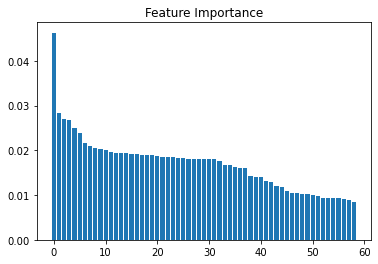

In [10]:

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            label_name[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           label_name[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [11]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.02, prefit=True)
X_selected = sfm.transform(X_train)
print('이 임계 조건을 만족하는 샘플의 수:', X_selected.shape[1])

이 임계 조건을 만족하는 샘플의 수: 11


In [12]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            label_name[indices[f]], 
                            importances[indices[f]]))

 1) 57                             0.046273
 2) 43                             0.028399
 3) 46                             0.026920
 4) 24                             0.026780
 5) 17                             0.025017
 6) 48                             0.023867
 7) 56                             0.021529
 8) 9                              0.020868
 9) 10                             0.020458
10) 47                             0.020287
11) 42                             0.020150
